In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

### Read the dataset

In [2]:
os.chdir(r'C:\Users\Siddhant Agarwal\Desktop\udemy ml atoz\Machine Learning A-Z Template Folder\Part 1 - Data Preprocessing')
dataset = pd.read_csv('Data.csv')

X = dataset.iloc[:, :-1].values # .values will give us an array instead of df
y = dataset.iloc[:, -1].values

### Taking Care of missing data

In [4]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=np.nan, strategy='mean', axis=0, verbose=1) # axis=0 means col wise

# imputer = imputer.fit(X[:, 1:3])
# X[:, 1:3] = imputer.transform(X[:, 1:3])
# OR USE fit_transform like below:
X[:, 1:3] = imputer.fit_transform(X[:, 1:3])

c:\users\siddhant agarwal\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

### Encode categorical data

In [6]:
# catg are text mainly - here we see that country col has 3 diff catgs and 
# we want to encode(replace text by nos) here so that computer can
# understand mathmatical eqtns.

### Using label Encoder

In [7]:
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()

X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

# by doing above, 1 problem can arise and that is the enocded values 0,1,2
# model thinks that 2>1>0 and that will mean that Spain>germany>France
# (> means 'higher importance') but this is not the case.
# These are actually three categories and there is no relational order 
# between the three. This wouldn't make any sense. if we had for example
# the variable 'size' with sizes like small, medium and large then yes we
# could express orders between the values of this variable because large
# is greater than medium and medium is greater than smo.

# So we have to prevent the machine learning equations from thinking that
# Germany is greater than France and Spain is greater than Germany.
# TO do this use dummy variables. That means that instead of having one
# column here we're going to have columns equal to the number of categories.
# (One Hot Encoding)

# so now we will make 3 cols each for France, Germany and Spain
# If the obs row has France then France will be 1 and rest all 0
# If the obs row has Germany then Germany will be 1 and rest all 0
# If the obs row has Spain then Spain will be 1 and rest all 0

In [8]:
X

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

### Using One HOT  Encoder

In [9]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder(categorical_features = [0])

X = onehotencoder.fit_transform(X).toarray()

# now for the dependent variable (y) we dont need to use Onehotencoder as 
# model will recognize it as categs and there is no order b/w those 2

labelencoder_y = LabelEncoder()
y = labelencoder_X.fit_transform(y)

c:\users\siddhant agarwal\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\siddhant agarwal\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [10]:
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.40000000e+01,
        7.20000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.70000000e+01,
        4.80000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.00000000e+01,
        5.40000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.80000000e+01,
        6.10000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.00000000e+01,
        6.37777778e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.50000000e+01,
        5.80000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.87777778e+01,
        5.20000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.80000000e+01,
        7.90000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 5.00000000e+01,
        8.30000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.70000000e+01,
        6.70000000e+04]])

### Split the data in Train and Test set

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# never take test_size > 0.4

### Feature Scaling

In [8]:
# here the age and salary column dont have the same scale, it will cause
# some issues in ML model. Its coz most ML models are based on Euclidean
# distance. So ML model will compute ED for age and Salary and since salary
# has much wider range of values (going from 0 to 100K), the ED will be 
# dominated by the salary, so we will have to put the variables on same scale
# i.e transform both the cols and have values in same range.
# Ex: -1 to +1 for both the variables.

# Also if ML model is not based on FS, we must do FS so that our algo will
# converge much faster. (Ex: decision trees)

# Feature Scaling:
#         1. Standardization   2. Normalization

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

# fit the SC on x_train first then transform the x_test
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test)

# Simple Linear regression

In [9]:
os.chdir(r'C:\Users\Siddhant Agarwal\Desktop\udemy ml atoz\Machine Learning A-Z Template Folder\Part 2 - Regression\Section 4 - Simple Linear Regression')

### Data preprocessing template

In [10]:
dataset = pd.read_csv('Salary_Data.csv')

# make sure you do 2D array like slicing for X otherwise it gives error while fitting and predicting.
X = dataset.iloc[:, :-1].values # .values will give us an array instead of df
y = dataset.iloc[:, 1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

### Fitting Simple Linear Regression to the traning set

In [11]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression() # optional parameters and we are OK with default
regressor.fit(X_train, y_train) # X_train should be a 2D array otherwise it will give error
                                # make sure you do 2D array like slicing

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predicting the Test set results

In [12]:
# vector of predictions for dependent variable.
y_pred = regressor.predict(X_test) # predcited salaries

### Visualizing the training set results

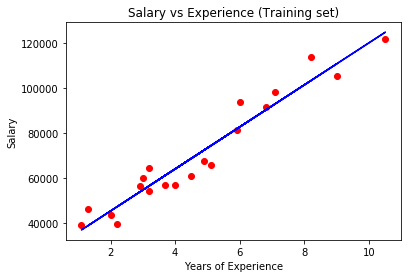

In [13]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# in below graph, red dots are the real values of the empployees
# and the blue line shows the predicted salaries of the same X_train

### Visualizing the test set results (new observations)

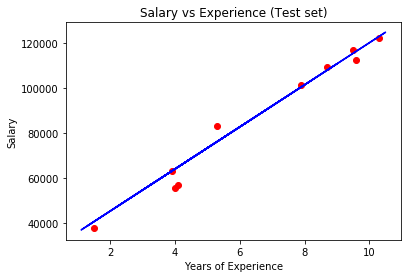

In [14]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# in below graph, red dots are the new values, obs of the test set
# and the blue line shows the predicted salaries of the X_train 
# (same as above graph)

# Multiple Linear Regression

In [39]:
# here in this dataset we want to find whether the first 4 colns have any
# linear dependency on the Profit(dependent) coln. So that in the end our model will
# be able to predict the profits based on the independent varibales.

# col names in order
# R&D Spend -- Administration -- Marketing Spend -- State -- Profit

In [16]:
os.chdir(r'C:\Users\Siddhant Agarwal\Desktop\udemy ml atoz\Machine Learning A-Z Template Folder\Part 2 - Regression\Section 5 - Multiple Linear Regression')

dataset = pd.read_csv('50_Startups.csv')

# make sure you do 2D array like slicing for X otherwise it gives error while fitting and predicting.
X = dataset.iloc[:, :-1].values # .values will give us an array instead of df
y = dataset.iloc[:, 4].values

In [17]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [18]:
# here we have 1 col of  categorical varibales so we need to encode that colm
# this is a v.imp step and we cannot move ahead unless we encode this.

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# label enocder will chamge the text into nums.
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])

# now do one-hot-enocode on those numbers
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

c:\users\siddhant agarwal\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\siddhant agarwal\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [19]:
# Avoiding the dummy varibale trap
X = X[:, 1:]

# this step needs to be done - that is removing one dummy variale from the
# eqaution as it is not necessary. Here the sklearn lib will take care of 
# this, but it needs to be done for some librarys.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
# here we wont be using feature scaling and the lib will take care of us here

### Fitting Multiple Linear Regression on Training Set

In [22]:
from sklearn.linear_model import LinearRegression

# we are still using Linear Regression but with multiple variables
# make a obj regressor from the LinearRegression class and fit the training set on it.
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predicting the test set results (code mostly same for all ML models)

In [23]:
# create a vector of predictions
y_pred = regressor.predict(X_test)

## Optimizing the model using Backward Elimination

In [24]:
# When we build the model above, we used all the variables to make the model
# but it can be the case that among these independent variables, some are
# highly statistically significant (i.e have great impact on dependent var.
# or o/p var.) and some are less signif. And if we remove these less signf.
# vars we will still get some good results.
# Now using this method we will find a set of independent vars. that have 
# a direct impact on o/p var.

In [25]:
# using backward elimination
# import statsmodels.formula.api as sm  --> this is an older version on Udemy
import statsmodels.api as sm

# now this library doesnt takes the constant part of the multiple linear
# equation into consideration so we need to manually add this. Also in our
# dataset we have only independent vars (i.e x, x1, x2, etc) and not the
# constant b0.
# so we will add a coln of 1s here that will correspond to b0 and sm library
# will understand that this is multiple linear reg eqn.

# X = np.append(arr = X, values = np.ones((50, 1)).astype(int) , axis = 1)

# we want values to be an array of same size that of X so we used np.ones 
# func that can give us same matrix (50 X 1) and it needs to be converted
# to int othwerwise we will get data type error. Also one thing to notice
# here is that ones coln is getting appended after the X but we want the
# matrix of 1s to be present in the starting of X. So for this we will
# switch the positions of 'arr' and 'values'
X = np.append(arr = np.ones((50, 1)).astype(int) , values =  X , axis = 1)

# making X into a df for better visibility
X_df = pd.DataFrame(data=np.int_(X[:,:]))

In [26]:
X_df

,0,1,2,3,4,5
0,1,0,1,165349,136897,471784
1,1,0,0,162597,151377,443898
2,1,1,0,153441,101145,407934
3,1,0,1,144372,118671,383199
4,1,1,0,142107,91391,366168
5,1,0,1,131876,99814,362861
6,1,0,0,134615,147198,127716
7,1,1,0,130298,145530,323876
8,1,0,1,120542,148718,311613
9,1,0,0,123334,108679,304981


In [27]:
# goal is to make a set of optimal independent variables.
# X_opt will going to be the team of optimal vars that will be statistically dependent on o/p var
# since in backward elimination we hv to include all the vars at first then we will remove one by
# one the vars that are not statistically significant.
X_opt = X[:, [0, 1, 2, 3, 4, 5]]

# making X into a df for better visibility
X_opt_df = pd.DataFrame(data=np.int_(X_opt[:,:]))
X_opt_df

,0,1,2,3,4,5
0,1,0,1,165349,136897,471784
1,1,0,0,162597,151377,443898
2,1,1,0,153441,101145,407934
3,1,0,1,144372,118671,383199
4,1,1,0,142107,91391,366168
5,1,0,1,131876,99814,362861
6,1,0,0,134615,147198,127716
7,1,1,0,130298,145530,323876
8,1,0,1,120542,148718,311613
9,1,0,0,123334,108679,304981


In [28]:
# Follow the steps of backward elimination now
# Step 1: Select a significance lvl to stay in the model. If p-val > SL then var is not optimal.
SL = 0.05 # 5 percent

# Step 2: Fit the full model with all possible predictors. Its the same as we created just before
#         Backward Elim. but we did not use this current lib so we will fit it again by creating 
#         a new regressor using this statsmodels lib from class OLS (Ordinary Least Squared)
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()

# Step 3: Find the predictor with Hightest P-val. If p-val ? SL , then remove it and fit new 
#         model without these discarded vars. If we do the .summary() on regressor then we will
#         get the impact of all the attributes and some additional statistical info.
print(regressor_OLS.summary())
print('*-' * 35)

# Step 4: Now by seeing above summary we see that x2 that highest P val of 99 percent so we will
# remove this var as it's (> SL).
X_opt = X[:, [0, 1, 3, 4, 5]]

# Step 5: Retrain the model again w/o this x3 var
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
print(regressor_OLS.summary())
print('*-' * 35)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 13 Aug 2019   Prob (F-statistic):           1.34e-27
Time:                        23:16:47   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.0

## Here some p-val has 0.000 values that means its very very small.
## p-val cannot be 0

In [29]:
# making X into a df for better visibility
X_opt_df = pd.DataFrame(data=np.int_(X_opt[:,:]))
X_opt_df

,0,1,2,3,4
0,1,0,165349,136897,471784
1,1,0,162597,151377,443898
2,1,1,153441,101145,407934
3,1,0,144372,118671,383199
4,1,1,142107,91391,366168
5,1,0,131876,99814,362861
6,1,0,134615,147198,127716
7,1,1,130298,145530,323876
8,1,0,120542,148718,311613
9,1,0,123334,108679,304981


### Now Follow steps 3 to 5 until we get p-val for all vars < SL (0.05)

In [30]:
# removing var at index 1 as per above summary and retrain it.
X_opt = X[:, [0, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
print(regressor_OLS.summary())
print('*-' * 35)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 13 Aug 2019   Prob (F-statistic):           4.53e-30
Time:                        23:17:48   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.0

In [31]:
# making X into a df for better visibility
X_opt_df = pd.DataFrame(data=np.int_(X_opt[:,:]))
X_opt_df

,0,1,2,3
0,1,165349,136897,471784
1,1,162597,151377,443898
2,1,153441,101145,407934
3,1,144372,118671,383199
4,1,142107,91391,366168
5,1,131876,99814,362861
6,1,134615,147198,127716
7,1,130298,145530,323876
8,1,120542,148718,311613
9,1,123334,108679,304981


In [32]:
# removing var at index 2 as per above summary and retrain it.
X_opt = X[:, [0, 3, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
print(regressor_OLS.summary())
print('*-' * 35)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 13 Aug 2019   Prob (F-statistic):           2.16e-31
Time:                        23:18:01   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.0

In [33]:
# making X into a df for better visibility
X_opt_df = pd.DataFrame(data=np.int_(X_opt[:,:]))
X_opt_df

,0,1,2
0,1,165349,471784
1,1,162597,443898
2,1,153441,407934
3,1,144372,383199
4,1,142107,366168
5,1,131876,362861
6,1,134615,127716
7,1,130298,323876
8,1,120542,311613
9,1,123334,304981


In [34]:
# removing var at index 2 as per above summary and retrain it.
X_opt = X[:, [0, 3]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
print(regressor_OLS.summary())
print('*-' * 35)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Tue, 13 Aug 2019   Prob (F-statistic):           3.50e-32
Time:                        23:18:10   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.0

In [35]:
# making X into a df for better visibility
X_opt_df = pd.DataFrame(data=np.int_(X_opt[:,:]))
X_opt_df

,0,1
0,1,165349
1,1,162597
2,1,153441
3,1,144372
4,1,142107
5,1,131876
6,1,134615
7,1,130298
8,1,120542
9,1,123334


In [ ]:
# Here the variable that is left is the R&D spend which is the most significantly related to our
# output variable.

## Automated version of backward elimination using p-vals only

In [36]:
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x

SL = 0.05
X_optimized = X[:, [0, 1, 2, 3, 4, 5]]
X_Modeled = backwardElimination(X_optimized, SL)

In [38]:
# We can also cross check this X_Modeled with the final X_opt that we have and it turns out to
# be same. hence we are doing the manual picking of variables correctly.

# Polynomial Regression

In [40]:
# in these regression models, we cannot fit a straight line in our dataset instead we have to
# make a polynomial eqn to fit a curve in the dataset.
# Funfact -> this is a polynomial linear regression. 
# plynoimial coz the eqn is related to x , x1^2 ...
# linear coz the coefficients are b0, b1, b2 ...

In [ ]:
# So we are a HR team working for a big company and we are about to hire a new employee in this
# company. A employee seems to be a good fit for the job and we are about to make an offer to him
# And now it's time to negotiate on what is going to be the future salary of this new employee.
# And so at the beginning of the negotiation this new employee is telling that he's had 20 plus
# years of experience and eventually earns 160 K annual salary in its previous company. So this
# employee is asking for at least more than 160 k. However there is someone in the HR Team that
# always fantasised about being a detective, so suddenly decides to call the previous employer
# to check that info. But unfortunately all the info that this person manages to get is this csv
# dataset (Table of salaries for 10 different positions in the previous company)
# A member of the HR team runs a simple analysis on Excel, actually observes that there is no
# need there a relationship between these levels and their associated salaries However this H.R.
# person could get another very relevant info. This other relevant info is that this new employee
# has been a region manager for two years now and usually it takes on average four years to jump
# from being a regional manager to a partner. So this employee was kind of halfway between Level
# 6 and level 7 and therefore we can say he was level 6.5
# So now this H.R. guy is getting all excited because he's selling to the team that he can build
# a bluffing detector using regression models and predict if this new employee is bluffing about
# its salary. So at the beginning the team finds it a little weird but it's kind of curious to
# see what's going to happen and therefore Here is the mission.
# This new employee is telling that it's annual salary was 160 k let's predict if it's truth or
# bluff by building a bluffing detector using polynomial regression.

In [42]:
os.chdir(r'C:\Users\Siddhant Agarwal\Desktop\udemy ml atoz\Machine Learning A-Z Template Folder\Part 2 - Regression\Section 6 - Polynomial Regression')

dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [43]:
# Observations in dataset:

# We don't need Position column because it's strictly equivalent to Level column. Remember the 
# machine is to pull in the whole regression and this machine is going to learn the correlations
# between the levels and the salaries to predict if the employee is bluffing about its salary.
# In short our matrix of features X will be composed of only one independent variable which will
# be the level column and our dependent variable x or y here will be this salary column

# X = dataset.iloc[:, 1].values

# there is something we can improve here because if I execute above line here to create the
# matrix of features and the dependent variable vector. We see that X has a single dimension or
# is a vector. But when we build a machine learning model and especially here this regression
# ******* model we want our matrix of features to be considered all the time as a matrix and
# not as a vector here.*******
# To specify that X is a matrix and not a vector here. We will just add here colon too.

# see that by doing that now X will be considered as a matrix And before we had (10, nothing)
# and now (10, 1) means that now x is well seen as a matrix of 10 lines and one column.
# This way we never get any warning.

# make sure you do 2D array like slicing for X otherwise it gives error while fitting and predicting.
X = dataset.iloc[:, 1:2].values # .values will give us an array instead of df
y = dataset.iloc[:, 2].values

In [44]:
# Now step is to split the data set into the training set and set. No need to do that here.
# Two reasons it's because when we look at our data set we can see that we have 10 observations
# and when we have this very small number of observations Well it doesn't make much sense to split
# the data set into a training set and test set because we simply don't have enough information to
# train a model on the one set and test its performance on another set.
# And the second reason is that we want to make a very accurate prediction because it's something
# real we're talking about here. We're trying to predict the central elements of the negotiation
# we are having there is this salary of this new employee so we need to not miss the target here
# and therefore we need to make a very accurate prediction. Otherwise the negotiation could turn
# pretty bad. And in order to make the most accurate prediction we actually need to have the
# maximum info as possible so that the model perfectly gets the correlations of this dataset.
# that's why only for this time we can allow ourselves to take the whole dataset to train model.

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# And finally the last step of the preprocessing phase features scaling so will we need to apply
# features getting for a data set here. Well the answer is no because polynomial regression 
# actually just consist of adding some polynomial terms into the multiple regression equation
# and therefore we will use the same linear regression library that we used before

In [80]:
from sklearn.linear_model import LinearRegression

# Fitting Linear regression to the dataset (w/o polynomial vars)
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
# Fitting polynomial regression to the dataset, for this we need to import a class from pre-
# -processing library that will help us with poly reg.
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 2)

# poly_reg is a tool that will help us to transforms X to a new matrix of features that contains 
# more independent vars like x^2, x^3, etc.
X_poly = poly_reg.fit_transform(X)
X_poly

In [48]:
# here the 2nd coln is our main Level coln and 3rd coln is the polynomial coln of degree 2 and 
# coln 1 is the col of 1s that we used before as a constant term (b0) and is automatically imputed
# by polynomial regression class.

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [49]:
# now we will use the above trasformed X_poly to fit into the linear regression.
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualizing the results of above Linear Regression

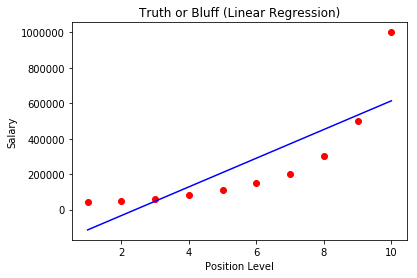

In [55]:
plt.scatter(X, y, color='red')

# plot the predictions on the above graph also
plt.plot(X, lin_reg.predict(X), color='blue')

plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [58]:
# predictions are in blue and red are the original points
# Seems to be above linear reg not a good prediction

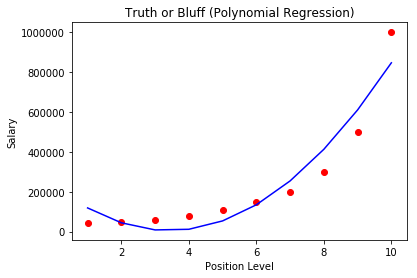

In [59]:
plt.scatter(X, y, color='red')

# plot the predictions on the above graph also
# we didnt use X_poly but the generalized form of X_poly
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color='blue')

plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [60]:
# Voila :)  much better than last time
# we can make it much better my increasing the degree to 3

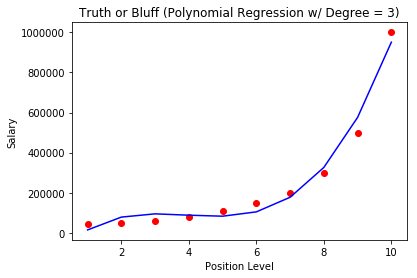

In [68]:
degree = 3

poly_reg_3 = PolynomialFeatures(degree = degree)
X_poly_3 = poly_reg_3.fit_transform(X)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly_3, y)

plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_3.predict(poly_reg_3.fit_transform(X)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression w/ Degree = {})'.format(degree))
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

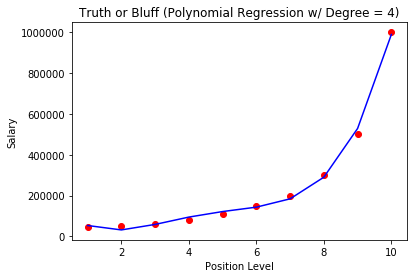

In [89]:
degree = 4

poly_reg_3 = PolynomialFeatures(degree = degree)
X_poly_3 = poly_reg_3.fit_transform(X)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly_3, y)

plt.scatter(X, y, color='red')
plt.plot(X, lin_reg_3.predict(poly_reg_3.fit_transform(X)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression w/ Degree = {})'.format(degree))
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

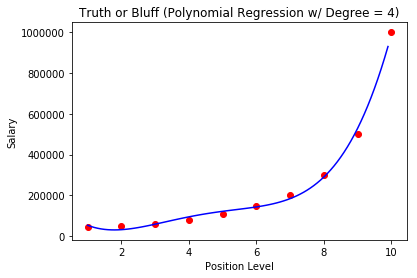

In [73]:
# Best Regression model we can achieve so we will use Degree 4 model.
# but we can see some straight lines from one position to another this is coz of levels too far
# we can make a less level matrix and plot it
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_reg_3.predict(poly_reg_3.fit_transform(X_grid)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression w/ Degree = {})'.format(degree))
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [74]:
# Now we got a more continuous curve by changing the interval of X axis.

## Predicting a new result with Linear Regression

### Error wala way of predicting one sample

In [82]:
# lin_reg.predict(6.5)
# this above line will throw a error

### Solution to avoid Error if we have 1 sample not matrix 

In [84]:
# solution 1
lin_reg.predict([[6.5]]) # --> passing a 2D array

# the output is exactly what we were edtimating from graph of Linear Regression

array([330378.78787879])

In [85]:
# solution 2
# complex but it better shows that by reshaping 6.5 into a 2D array format (which is what the
# warning message advise) .predict can function normally again.

lin_reg.predict(np.array(6.5).reshape(-1,1))

# This command reshapes 6.5 into a 2D array in the shape of (-1,1). The meaning of (-1,1) is 
# that: 6.5 is one sample of sample size of any (thus the amount or rows is "-1"), and it is the
# only independent variable (thus the amount of of columns is "1").

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [91]:
lin_reg_3.predict(poly_reg_3.fit_transform([[6.5]]))

array([158862.45265155])

In [92]:
# Verdict - The emplyee was telling Truth :)

# Support vector Regression (SVR)

In [95]:
# use the lecture to undertand the theory.

In [112]:
os.chdir(r'C:\Users\Siddhant Agarwal\Desktop\udemy ml atoz\Machine Learning A-Z Template Folder\Part 2 - Regression\Section 7 - Support Vector Regression (SVR)')

dataset = pd.read_csv('Position_Salaries.csv')

# make sure you do 2D array like slicing for X otherwise it gives error while fitting and predicting.
X = dataset.iloc[:, 1:2].values # .values will give us an array instead of df
y = dataset.iloc[:, 2].values

### Fitting SVR to the dataset

In [101]:
from sklearn.svm import SVR

# we chose rbf (gaussion kernel) coz we know our problem is non linear and poly kernel can also
# work but rbf is more common to use hence its a deafult kernel also in SVR.
# we used gamma pararmeter to avoid warnings in newer version of SVR
regressor = SVR(kernel='rbf', gamma='auto')

regressor.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Predicting the new test result

In [105]:
y_pred = regressor.predict([[6.5]])
y_pred

# this does not seems to be a good prediction

array([130001.55760156])

### Visualization

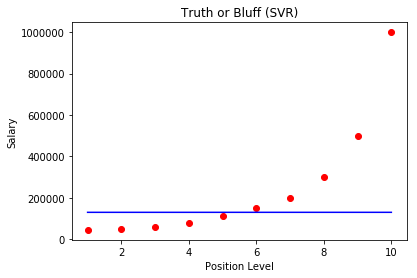

In [106]:
plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [109]:
# Now above line does not seems to be a SVR. Whats happpedning wrong ?
# The answer is feature Scaling. Since we were told before that FS is implemented by itself in
# linear regressions but this is not a common type of regression so FS is not included in SVR.

### Feature Scaling for improvement of the model

## Predicting and Visualizing the same thing using Feature Scaling

In [119]:
os.chdir(r'C:\Users\Siddhant Agarwal\Desktop\udemy ml atoz\Machine Learning A-Z Template Folder\Part 2 - Regression\Section 7 - Support Vector Regression (SVR)')

dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [120]:
from sklearn.preprocessing import StandardScaler

# we cannot use one object and fit to both X and y as we are doing some transforming also.
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X) 
y = sc_y.fit_transform(np.array(y).reshape(-1,1)) # if we wrtoe only y then we will get dimension error

[170370.0204065]


c:\users\siddhant agarwal\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


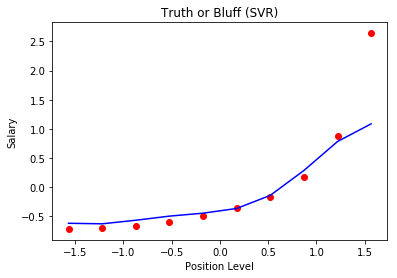

In [122]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf', gamma='auto')
regressor.fit(X, y)

y_pred = regressor.predict(sc_X.transform(np.array([[6.5]]))) # scale the input value X.
print(sc_y.inverse_transform(y_pred)) # transform back the y_pred to original scale.

plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [118]:
# Now according to this model, CEO position is an outlier and hence it doesnt tries to fit that
# datapoint into the model.

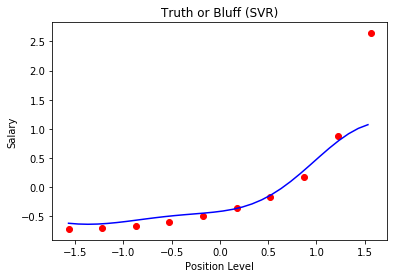

In [123]:
# but we can see some straight lines from one position to another this is coz of levels too far
# we can make a less level matrix and plot it
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()